In [1]:
import os
import cv2
import pickle
import shutil
import numpy as np
import retrain_yolo
from matplotlib import pyplot as plt

boxes_file = 'train_boxes.p'
data_path = './own_images'
file_list = os.listdir(data_path)

if os.path.exists(data_path+'/.ipynb_checkpoints'):
    shutil.rmtree(data_path+'/.ipynb_checkpoints')
    

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
f = open('own_class.txt','r')
print(f.read())

#類別的txt檔案，請將自己label完成類別順序，依序填入，以下為範例(若不是引用demo的資料集，請從空白的txt開始，請不要延續增加)


akane
neru
rika
risa
yui


Use Own Data!
Data loaded.
There are 538 images and boxes
Preprocessing data...
Done preprocessing!
start training
Train on 484 samples, validate on 54 samples
Epoch 1/10
484/484 [==============================] - 6s 13ms/step - loss: 942.4546 - val_loss: 223.3976
Epoch 2/10
484/484 [==============================] - 4s 8ms/step - loss: 152.1774 - val_loss: 136.2050
Epoch 3/10
484/484 [==============================] - 4s 8ms/step - loss: 120.2637 - val_loss: 121.8047
Epoch 4/10
484/484 [==============================] - 4s 8ms/step - loss: 111.7006 - val_loss: 115.8118
Epoch 5/10
484/484 [==============================] - 4s 8ms/step - loss: 106.7828 - val_loss: 112.3012
Epoch 6/10
484/484 [==============================] - 4s 8ms/step - loss: 103.1669 - val_loss: 109.0991
Epoch 7/10
484/484 [==============================] - 4s 8ms/step - loss: 100.1781 - val_loss: 106.7338
Epoch 8/10
484/484 [==============================] - 4s 8ms/step - loss: 97.9636 - val_loss: 105.1705
Epoch 9/

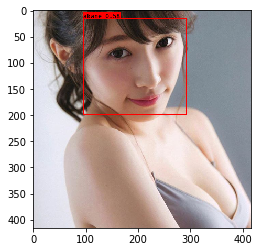

train
(484, 1, 416, 416, 3)
Found 1 boxes for image.
[[ 49.47564  65.81885 301.31448 237.06021]]
yui 0.93 (66, 49) (237, 301)


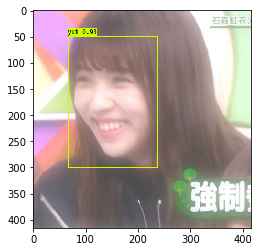

In [3]:
args = retrain_yolo.argparser.parse_known_args()[0]
args.data_path = data_path
args.boxes_path = boxes_file
#args.classes_path = '/data/aia-data/yolo_data/model_data/pascal_classes.txt'
args.classes_path = 'own_class.txt'

args.epoch_1 = 10        #第一部分訓練正常更新CNN權重
args.epoch_2 = 30        #凍結前面的權重，只保留更新最後一層含有bonuding box與class的卷積層
args.own_data = True     #這個Jupyternote一定要使用自己的圖片資料請選 True

t = retrain_yolo._main(args)